## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Load the Dataset

In [3]:
df=pd.read_csv(r"C:\Users\Shweta\Desktop\Python\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Check for null values

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Drop Irrelevant Columns

In [12]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## EDA

## Distribution of Age

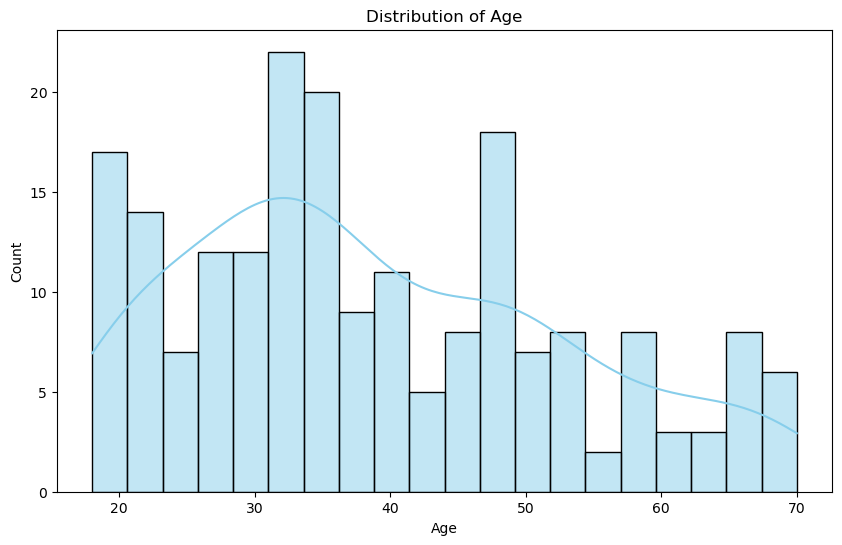

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

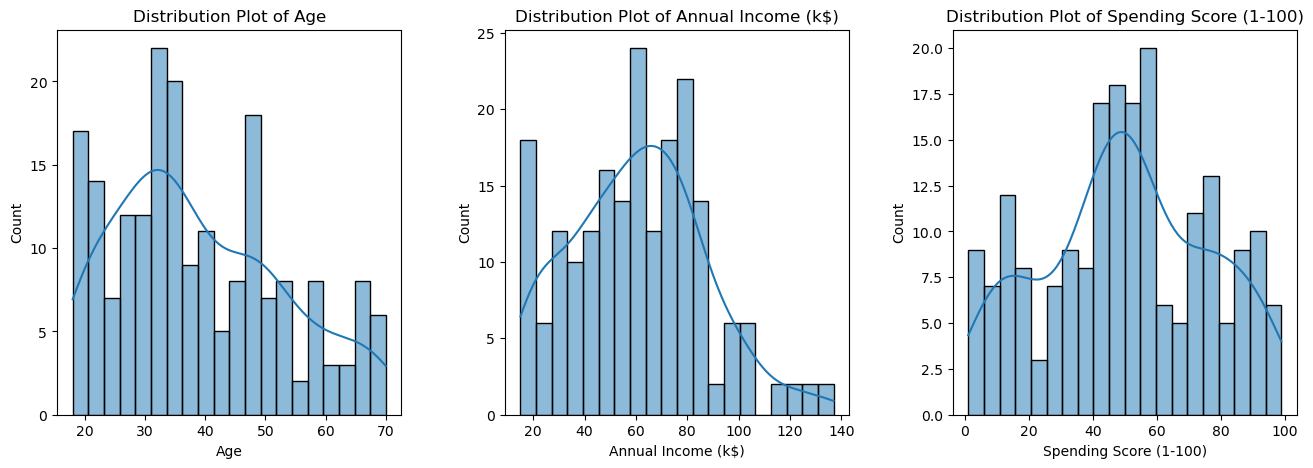

In [24]:
plt.figure(figsize=(16, 5))

for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

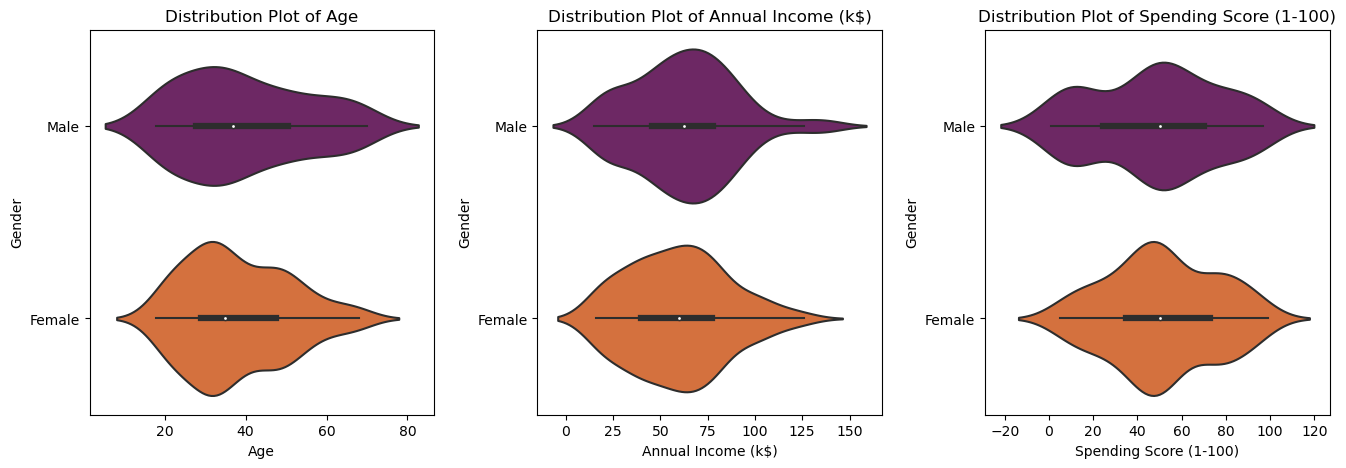

In [27]:
plt.figure(figsize=(16, 5))

for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x=column, y='Gender', data=df, palette='inferno')
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Gender')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

## Customer Segementaion According to Age and Spending Score

## Elbow Method

C:\Users\Shweta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shweta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shweta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shweta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

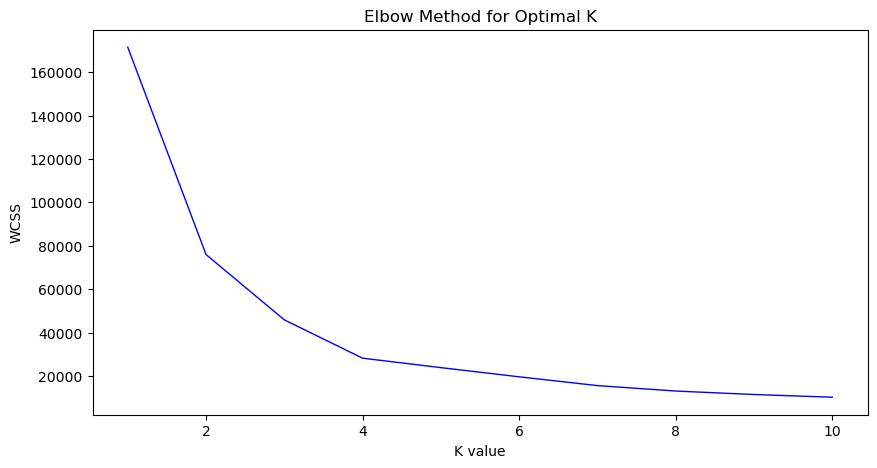

In [33]:
X = df.loc[:, ['Age', 'Spending Score (1-100)']].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, linewidth=1, color='blue')
plt.xlabel("K value")
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

The optimal number of clusters should be 4

In [34]:
kmeans= KMeans(n_clusters=4)
label= kmeans.fit_predict(X)

C:\Users\Shweta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shweta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
print(label)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [36]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


## Scatterplot for the segments

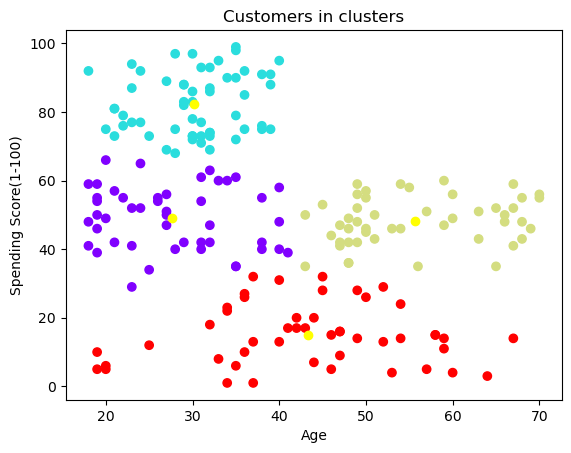

In [47]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='yellow')
plt.title('Customers in clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()